<a href="https://colab.research.google.com/github/adrianbarrenada/APRENDIZAJE_AUTOMATICO_23_24/blob/main/LAB02_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica 1

En este ejercicio, exploraremos el análisis de asociación utilizando el Dataset Market_Basket_Optimisation.csv proporcionado. El análisis de asociación es una técnica utilizada en minería de datos que busca encontrar patrones frecuentes entre los elementos de un conjunto de datos, como los productos comprados por los clientes en un supermercado.

Primero, vamos a ver la diferencia entre usar soporte y frecuencia en el análisis de asociación.

Luego, vamos a ver cómo diferentes configuraciones de soporte y confianza afectan las reglas que encontramos. Cambiar el soporte puede hacer que algunas reglas desaparezcan si el grupo de productos no es lo suficientemente común en las compras. De igual manera, ajustar la confianza puede hacer que desaparezcan reglas menos seguras. Si pones una confianza alta, solo verás las reglas más seguras.

Por último, vamos a mirar las mejores configuraciones y ver si hay algún patrón que se repita. Esto nos dará una idea de cómo suelen comportarse los clientes en el supermercado. Usaremos gráficos para hacer todo esto más fácil de entender.

In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
!pip install --upgrade pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Market_Basket_Optimisation.csv' #poner ruta de guardado en drive

data = pd.read_csv(file_path, delimiter=r',', engine='python')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Vamos a ver qué aspecto tiene nuestra base de datos:

In [ ]:
print(data.head())

           shrimp    almonds     avocado    vegetables mix green grapes  \
0         burgers  meatballs        eggs              None         None   
1         chutney       None        None              None         None   
2          turkey    avocado        None              None         None   
3   mineral water       milk  energy bar  whole wheat rice    green tea   
4  low fat yogurt       None        None              None         None   

  whole weat flour  yams cottage cheese energy drink tomato juice  \
0             None  None           None         None         None   
1             None  None           None         None         None   
2             None  None           None         None         None   
3             None  None           None         None         None   
4             None  None           None         None         None   

  low fat yogurt green tea honey salad mineral water salmon antioxydant juice  \
0           None      None  None  None          None 

La funcion `read_csv` ha creado por defecto 20 columnas, una por cada producto distinto de todo el dataset. Esto a priori no nos gusta mucho, porque los valores para un registro cualquiera en la columna "shrimp" (por ejemplo) no es 1 o 0, si no otro producto.


Limpiamos valores `NaN`, y vemos que se elimina toda la última columna, "olive oil". Parece que está compuesta solo por valores `NaN`.
Más adelante veremos por qué ocurre esto.

In [ ]:
df_cleaned = data.dropna(axis=1, how='all')

df_cleaned = data.replace('None', pd.NA).dropna(axis=1, how='all')

df_cleaned = df_cleaned.replace('None', ' ')


In [ ]:
print(df_cleaned.head())

           shrimp    almonds     avocado    vegetables mix green grapes  \
0         burgers  meatballs        eggs              None         None   
1         chutney       None        None              None         None   
2          turkey    avocado        None              None         None   
3   mineral water       milk  energy bar  whole wheat rice    green tea   
4  low fat yogurt       None        None              None         None   

  whole weat flour  yams cottage cheese energy drink tomato juice  \
0             None  None           None         None         None   
1             None  None           None         None         None   
2             None  None           None         None         None   
3             None  None           None         None         None   
4             None  None           None         None         None   

  low fat yogurt green tea honey salad mineral water salmon antioxydant juice  \
0           None      None  None  None          None 

In [ ]:
data.shape

(7500, 20)

In [ ]:
df_cleaned.shape

(7500, 19)

Hemos probado a usar el algoritmo a priori con el `dataframe`, pero no parecía funcionar. Vamos a intentarlo con nuestra base de datos en formato de matriz:

In [ ]:
dataprueba = [
    ["shrimp", "almonds", "avocado", "vegetables mix", "green grapes", "whole weat flour", "yams", "cottage cheese", "energy drink", "tomato juice", "low fat yogurt", "green tea", "honey", "salad", "mineral water", "salmon", "antioxydant juice", "frozen smoothie", "spinach", "olive oil"],
    ["burgers", "meatballs", "eggs"],
    ["chutney"],
    ["turkey", "avocado"],
    ["mineral water", "milk", "energy bar", "whole wheat rice", "green tea"],
    ["low fat yogurt"]
]

In [ ]:
import warnings
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

Parece que funciona.

In [ ]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
te = TransactionEncoder()
te_ary = te.fit(dataprueba).transform(dataprueba)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
print(frequent_itemsets)

    support                    itemsets
0  0.333333                   (avocado)
1  0.333333                 (green tea)
2  0.333333            (low fat yogurt)
3  0.333333             (mineral water)
4  0.333333  (green tea, mineral water)


Vamos a convertir todo nuestro dataframe en una matriz.

In [ ]:
csv_path = '/content/drive/My Drive/Market_Basket_Optimisation.csv'

matriz = []

# Convertimos cada fila en una lista
with open(csv_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        # Filtramos elementos no nulos
        filtered_row = [element for element in row if element is not None and element != 'None']
        matriz.append(filtered_row)

for row in matriz:
    print(row)


Se han truncado las últimas 5000 líneas del flujo de salida.
['cake']
['cereals']
['escalope', 'pasta', 'mushroom cream sauce']
['olive oil', 'light mayo']
['cottage cheese']
['herb & pepper', 'ground beef', 'champagne', 'green tea']
['hot dogs']
['spaghetti', 'french fries', 'energy drink']
['ham', 'shrimp', 'ground beef', 'mineral water', 'avocado', 'milk', 'brownies', 'protein bar']
['mineral water', 'almonds', 'cottage cheese', 'light mayo']
['protein bar']
['red wine', 'candy bars']
['mineral water', 'avocado', 'milk', 'almonds', 'eggs', 'french fries', 'melons']
['herb & pepper']
['vegetables mix', 'escalope']
['tomatoes', 'milk']
['milk', 'salmon']
['eggs']
['mineral water', 'vegetables mix', 'rice', 'light mayo']
['vegetables mix']
['muffins', 'cookies', 'green tea']
['grated cheese', 'spinach', 'eggs', 'cooking oil', 'green tea', 'salad']
['strawberries']
['mineral water', 'cake', 'chicken', 'french fries', 'tomato juice']
['mineral water', 'cereals']
['chocolate', 'french fri

Vamos a ver cuántos productos contiene el registro (o registros) con más productos.


In [ ]:
mayor = 0
for i in range(len(matriz)):
  if len(matriz[i]) > mayor:
    indice = i
    mayor = len(matriz[i])

print(mayor)

20


Vemos que el registro más grande contenía 20 productos, razón por la que la última columna de nuesto `dataframe` estaba completamente llena de valores NaN.

Llevemos a cabo el algoritmo a priori con todos los datos. Vemos que existe bastante homogeneidad. No hay un producto que se encuentre en más del 25% de las compras.

In [ ]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
te = TransactionEncoder()
te_ary = te.fit(matriz).transform(matriz)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets)

      support                                 itemsets
0    0.020397                                (almonds)
1    0.033329                                (avocado)
2    0.010799                         (barbecue sauce)
3    0.014265                              (black tea)
4    0.011465                             (body spray)
..        ...                                      ...
252  0.011065       (milk, mineral water, ground beef)
253  0.017064  (ground beef, mineral water, spaghetti)
254  0.015731         (milk, mineral water, spaghetti)
255  0.010265    (mineral water, olive oil, spaghetti)
256  0.011465     (mineral water, spaghetti, pancakes)

[257 rows x 2 columns]


Vamos a centrarnos en el caso K=1:

In [ ]:
from mlxtend.frequent_patterns import association_rules

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.00)
print(str(rules))

                   antecedents                 consequents  \
0              (mineral water)                   (avocado)   
1                    (avocado)             (mineral water)   
2                       (cake)                   (burgers)   
3                    (burgers)                      (cake)   
4                    (burgers)                 (chocolate)   
..                         ...                         ...   
401  (mineral water, pancakes)                 (spaghetti)   
402      (spaghetti, pancakes)             (mineral water)   
403            (mineral water)       (spaghetti, pancakes)   
404                (spaghetti)   (mineral water, pancakes)   
405                 (pancakes)  (mineral water, spaghetti)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.238368            0.033329  0.011598    0.048658  1.459926   
1              0.033329            0.238368  0.011598    0.348000  1.459926   
2              0.0

In [ ]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
print(str(rules))

                   antecedents                 consequents  \
0              (mineral water)                   (avocado)   
1                    (avocado)             (mineral water)   
2                       (cake)                   (burgers)   
3                    (burgers)                      (cake)   
4                    (burgers)                 (chocolate)   
..                         ...                         ...   
401  (mineral water, pancakes)                 (spaghetti)   
402      (spaghetti, pancakes)             (mineral water)   
403            (mineral water)       (spaghetti, pancakes)   
404                (spaghetti)   (mineral water, pancakes)   
405                 (pancakes)  (mineral water, spaghetti)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.238368            0.033329  0.011598    0.048658  1.459926   
1              0.033329            0.238368  0.011598    0.348000  1.459926   
2              0.0

In [ ]:
rules1 = rules[ (rules['antecedent_len'] == 1) &
       (rules['confidence'] > 0.35) &
       (rules['lift'] > 1.2) ]

print(rules1)

             antecedents      consequents  antecedent support  \
45             (cereals)  (mineral water)            0.025730   
58             (chicken)  (mineral water)            0.059992   
111        (cooking oil)  (mineral water)            0.051060   
182  (frozen vegetables)  (mineral water)            0.095321   
219        (ground beef)  (mineral water)            0.098254   
227        (ground beef)      (spaghetti)            0.098254   
244               (milk)  (mineral water)            0.129583   
263          (olive oil)  (mineral water)            0.065858   
265           (pancakes)  (mineral water)            0.095054   
267           (red wine)  (mineral water)            0.028130   
269             (salmon)  (mineral water)            0.042528   
272               (soup)  (mineral water)            0.050527   
277           (tomatoes)  (mineral water)            0.068391   
290           (red wine)      (spaghetti)            0.028130   

     consequent support 

Para k = 2:

In [ ]:
rules2 = rules[ (rules['antecedent_len'] == 2) &
       (rules['confidence'] > 0.3) &
       (rules['lift'] > 1.2) ]
print(rules2)

                            antecedents      consequents  antecedent support  \
308                   (eggs, chocolate)  (mineral water)            0.033196   
314                   (eggs, chocolate)      (spaghetti)            0.033196   
320            (ground beef, chocolate)  (mineral water)            0.023064   
325                   (milk, chocolate)  (mineral water)            0.032129   
330                   (milk, spaghetti)      (chocolate)            0.035462   
331                   (milk, chocolate)      (spaghetti)            0.032129   
337          (mineral water, chocolate)      (spaghetti)            0.052660   
338              (spaghetti, chocolate)  (mineral water)            0.039195   
343                 (eggs, ground beef)  (mineral water)            0.019997   
349                        (milk, eggs)  (mineral water)            0.030796   
356                   (spaghetti, eggs)  (mineral water)            0.036528   
360       (mineral water, french fries) 

No se esperan confianzas muy altas (por ejemplo de 0,75), esto se da por la presencia de muchos registros y muchos de ellos con muy pocos elementos.

K = 3:

In [ ]:
rules3 = rules[ (rules['antecedent_len'] == 3) &
       (rules['confidence'] > 0.2) &
       (rules['lift'] > 1) ]
print(rules3)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric, antecedent_len]
Index: []


Vemos que para k = 3 y una confianza menor (0,2) ya no existen reglas.

In [ ]:
# 4) Mostrar todas las posibles reglas con su confianza
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
print("Todas las posibles reglas con su confianza:")
print(rules)



Todas las posibles reglas con su confianza:
                   antecedents                 consequents  \
0              (mineral water)                   (avocado)   
1                    (avocado)             (mineral water)   
2                       (cake)                   (burgers)   
3                    (burgers)                      (cake)   
4                    (burgers)                 (chocolate)   
..                         ...                         ...   
427  (mineral water, pancakes)                 (spaghetti)   
428      (spaghetti, pancakes)             (mineral water)   
429            (mineral water)       (spaghetti, pancakes)   
430                (spaghetti)   (mineral water, pancakes)   
431                 (pancakes)  (mineral water, spaghetti)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.238368            0.033329  0.011598    0.048658  1.459926   
1              0.033329            0.238368  0.011598

Como se ha deducido antes, no hay confianzas muy altas, para continuar con el apartado 5 se va a establecer la confianza "exigida" para que salgan reglas significativas.

In [ ]:
# 5) Listar todas las reglas que sean de alta confianza
high_confidence_rules = rules[rules['confidence'] > 0.35]
print("Reglas de alta confianza:")
print(high_confidence_rules)

Reglas de alta confianza:
                        antecedents      consequents  antecedent support  \
45                        (cereals)  (mineral water)            0.025730   
58                        (chicken)  (mineral water)            0.059992   
117                   (cooking oil)  (mineral water)            0.051060   
204             (frozen vegetables)  (mineral water)            0.095321   
243                   (ground beef)  (mineral water)            0.098254   
251                   (ground beef)      (spaghetti)            0.098254   
268                          (milk)  (mineral water)            0.129583   
287                     (olive oil)  (mineral water)            0.065858   
289                      (pancakes)  (mineral water)            0.095054   
291                      (red wine)  (mineral water)            0.028130   
293                        (salmon)  (mineral water)            0.042528   
296                          (soup)  (mineral water)          

Vemos que para las reglas de alta confianza, 'mineral water' es muy frecuente. Esto es simplemente por que el agua es un producto con una frecuencia soporte muy alta, no necesariamente porque haya relación entre el antecedente y el consecuente. Aún así, se pueden ver reglas que sí que tienen sentido.

Seleccionamos, por ejemplo, las reglas cuyo antecedente es leche:

In [ ]:
# 6) Métodos adicionales
def reglas_por_antecedente(antecedent, rules):
    return rules[rules['antecedents'] == frozenset({antecedent})]

rules_with_milk = reglas_por_antecedente('milk', rules)
print("Reglas con 'leche' como antecedente:")

print(rules_with_milk)

Reglas con 'leche' como antecedente:
    antecedents                         consequents  antecedent support  \
16       (milk)                           (burgers)            0.129583   
36       (milk)                              (cake)            0.129583   
56       (milk)                           (chicken)            0.129583   
84       (milk)                         (chocolate)            0.129583   
114      (milk)                       (cooking oil)            0.129583   
136      (milk)                              (eggs)            0.129583   
172      (milk)                      (french fries)            0.129583   
190      (milk)                   (frozen smoothie)            0.129583   
203      (milk)                 (frozen vegetables)            0.129583   
225      (milk)                         (green tea)            0.129583   
240      (milk)                       (ground beef)            0.129583   
262      (milk)                    (low fat yogurt)            

Ahora añadimos una confianza mínima:

In [ ]:
def reglas_por_antecedente_confianza_min(antecedent, rules, min_confidence=0):
    # Filtra las reglas por el antecedente
    filtered_rules = rules[rules['antecedents'] == frozenset({antecedent})]
    # Filtra las reglas por la confianza mínima
    return filtered_rules[filtered_rules['confidence'] >= min_confidence]

rules_with_milk = reglas_por_antecedente_confianza_min('milk', rules, 0.15)
print("Reglas con 'leche' como antecedente:")

print(rules_with_milk)

Reglas con 'leche' como antecedente:
    antecedents          consequents  antecedent support  consequent support  \
84       (milk)          (chocolate)            0.129583            0.163845   
136      (milk)               (eggs)            0.129583            0.179709   
172      (milk)       (french fries)            0.129583            0.170911   
203      (milk)  (frozen vegetables)            0.129583            0.095321   
240      (milk)        (ground beef)            0.129583            0.098254   
268      (milk)      (mineral water)            0.129583            0.238368   
278      (milk)          (spaghetti)            0.129583            0.174110   

      support  confidence      lift  leverage  conviction  zhangs_metric  
84   0.032129    0.247942  1.513276  0.010898    1.111823       0.389677  
136  0.030796    0.237654  1.322437  0.007509    1.076009       0.280119  
172  0.023730    0.183128  1.071482  0.001583    1.014956       0.076645  
203  0.023597    0.182

Gráfico de dispersión de reglas por soporte y confianza:

Este gráfico muestra la relación entre el soporte y la confianza de las reglas encontradas en el análisis de asociación.
Cada punto en el gráfico representa una regla, donde el eje x (horizontal) representa el soporte de la regla y el eje y (vertical) representa la confianza.
Al observar este gráfico, podemos identificar diferentes patrones y tendencias en las reglas. Por ejemplo, es posible que veamos grupos de reglas con alta confianza pero bajo soporte, lo que podría indicar relaciones específicas entre productos que son comprados juntos con alta probabilidad pero no son muy comunes en general.


Histograma de confianza:

Este histograma muestra la distribución de la confianza de las reglas encontradas en el análisis de asociación.
El eje x (horizontal) representa los diferentes rangos de confianza, y el eje y (vertical) representa la frecuencia de reglas que caen en cada rango.
Al observar este histograma, podemos obtener una idea de cómo se distribuyen las confianzas de las reglas. Podemos ver si la mayoría de las reglas tienen una confianza similar o si hay una amplia variación en la confianza entre las reglas.

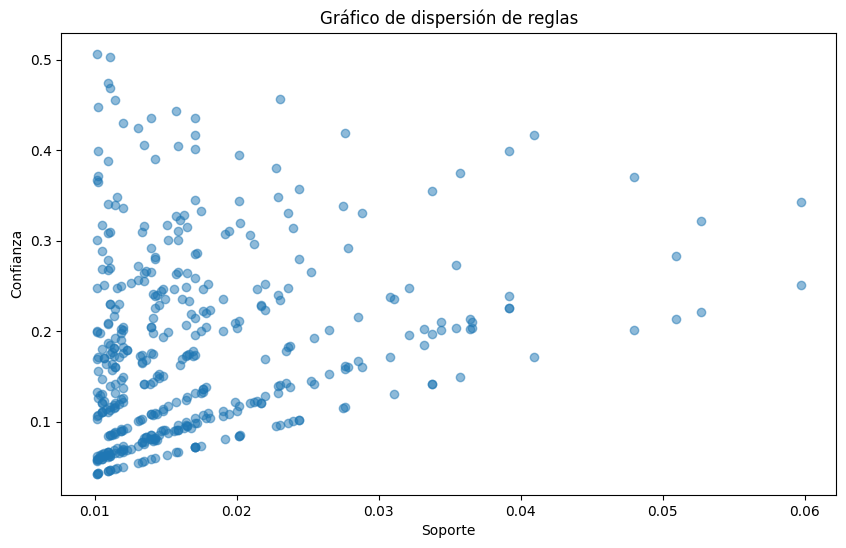

In [ ]:
# 7) Representaciones gráficas
# Gráfico de dispersión de reglas por soporte y confianza
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title('Gráfico de dispersión de reglas')
plt.show()

La concentración de puntos sugiere que hay una tendencia de que a menores valores de soporte corresponden mayores valores de confianza. A medida que el soporte aumenta (se mueve hacia la derecha en el gráfico), la confianza tiende a disminuir (los puntos bajan). Sin embargo, hay una disminución significativa en la densidad de puntos a medida que el soporte aumenta, lo que podría indicar que hay menos reglas (o casos) que tienen un alto soporte y una alta confianza al mismo tiempo.

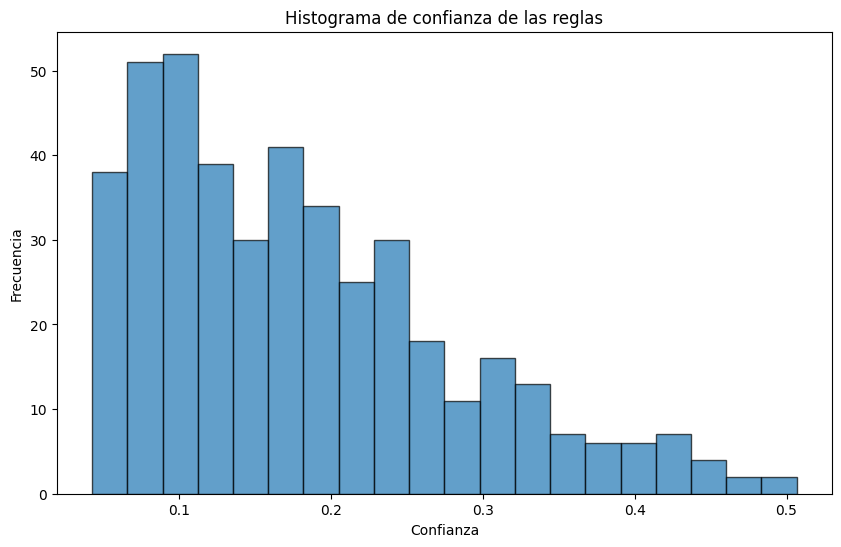

In [ ]:
# Histograma de confianza
plt.figure(figsize=(10, 6))
plt.hist(rules['confidence'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Confianza')
plt.ylabel('Frecuencia')
plt.title('Histograma de confianza de las reglas')
plt.show()

Este histograma muestra que la mayoría de las reglas tienen una confianza baja a moderada, con el mayor número de reglas concentradas en el rango de aproximadamente 0.1 a 0.2 de confianza. Hay menos reglas que tienen una confianza muy alta (cerca de 0.5). La forma del histograma es asimétrica y sesgada hacia la izquierda, lo que indica que hay más reglas con niveles bajos de confianza.

La forma del histograma cuenta que hay muchas más reglas que no son tan fiables; es más común encontrar reglas que a veces se aplican, pero no siempre. Esto es normal cuando se trabaja con mucha información y tratamos de encontrar patrones: no todos los patrones se repiten de forma perfecta siempre. Por otro lado, las reglas que casi nunca fallan son poco vistas. Esto nos dice que, aunque se han encontrado algunas conexiones fuertes en los datos, no aparecen a menudo.

# Práctica 2 (Patrones Secuenciales)


En primer lugar instalamos las librerias con las que vamos a trabajar en este segundo ejercicio.

In [ ]:
!pip install gsp_python

!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 27.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.25.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


Con las librerias ya correctamente insataladas y actualizadas cargamos el archivo Online_Retail.xlsx el cual debe estar localizado en nuestro Drive personal.

Esta base de datos va a ser guardada en forma de dataframe en la variable que llamamos 'data'.

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount("/content/drive", force_remount=True)

file_path = '/content/drive/My Drive/Online_Retail.xlsx' #poner ruta de guardado en drive

data = pd.read_excel(file_path)

Mounted at /content/drive


Vamos a mostrar los valores de los primeros registros mediante `.head` para hacernos una idea general de como esta organizado el dataframe con el que estamos trabajando.

De esta manera podemos ver que tipo de datos contiene cada atributo y como podemos limpiar el dataframe de outliers o valores que podrian carecer de sentido como un valor negativo en el atributo 'Quantity' o 'UnitPrice' donde solamente tendrian sentido valores positivos.

In [ ]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  


A continuación vamos a limpiar el dataframe de outliers, centrandonos como habiamos mencionado anteriormente en los atributos de 'Quantity' y 'Unitprice' debido a que estos son los unicos atributos que tienen valores numericos y en los cuales tendría sentido hacer un estudio de los outliers.

Vamos a comenzar con el estudio sobre el atributo 'Quantity'.

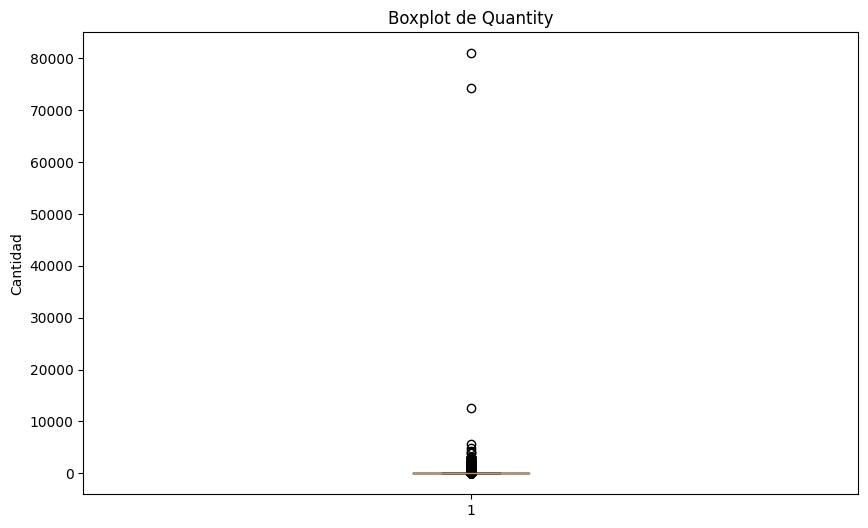

9         32
26        24
27        24
30        24
31        48
          ..
541876    24
541882    24
541883    25
541891    24
541892    24
Name: Quantity, Length: 56635, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Nos aseguramos de que la columna 'Quantity' contenga números enteros y sea mayor que 0
data = data[data['Quantity'] > 0]

# Dibujamos un diagrama de bigotes para la columna 'Quantity'
plt.figure(figsize=(10, 6))
plt.boxplot(data['Quantity'])
plt.title('Boxplot de Quantity')
plt.ylabel('Cantidad')
plt.show()

# Calculamos los cuartiles y el rango intercuartílico (IQR) para identificar outliers
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Identificamos los outliers
outliers = data[(data['Quantity'] < lower_whisker) | (data['Quantity'] > upper_whisker)]

# Mostramos los outliers
print(outliers['Quantity'])


Como podemos ver estamos eliminando más de cincuenta mil registros los cuales solo añaden ruido a nuestro modelo

In [ ]:
# Filtramos los valores atípicos extremos del DataFrame original
data = data[~((data['Quantity'] > upper_whisker))]

Repetimos este mismo proceso pero en este caso con la columna o registro 'UnitPrice'.

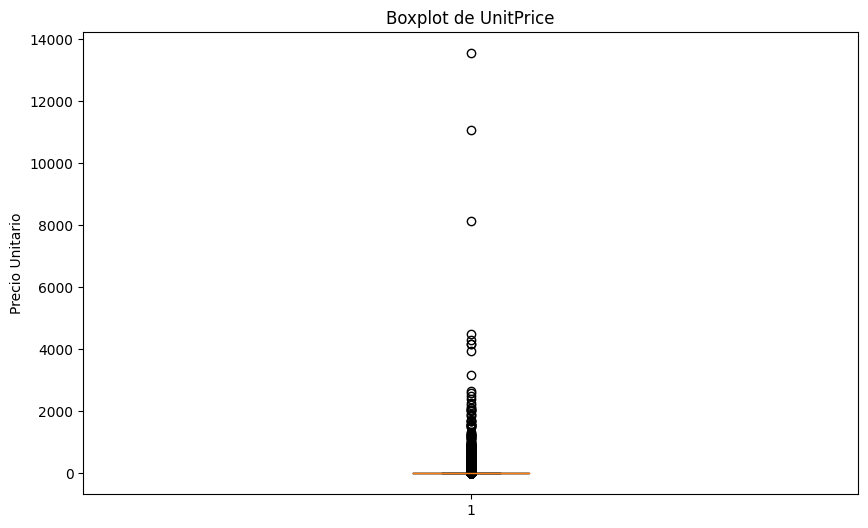

In [ ]:
# Nos aseguramos de que 'UnitPrice' sea mayor que 0
data = data[data['UnitPrice'] > 0]

# Boxplot para 'UnitPrice'
plt.figure(figsize=(10, 6))
plt.boxplot(data['UnitPrice'])
plt.title('Boxplot de UnitPrice')
plt.ylabel('Precio Unitario')
plt.show()

# Calculamos IQR para 'UnitPrice'
Q1 = data['UnitPrice'].quantile(0.25)
Q3 = data['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filtramos los valores que sean mayores que el límite superior
data_filtered = data[data['UnitPrice'] <= upper_bound]

Filtramos los outliers del dataframe original y a continuación mostramos el numero de registro que tiene el dataframe despues de esta limpieza.

In [ ]:
data = data[~((data['UnitPrice'] > upper_bound))]

# Verificar los resultados
print(f"Número total de registros después de filtrar UnitPrice: {len(data_filtered)}")

Número total de registros después de filtrar UnitPrice: 442666


## REORGANIZACIÓN DE LA INFORMACIÓN

Con el dataframe ya limpio de outliers vamos a crear una lista de los
distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instante de tiempos, todos los clientes tienen un clave que los identifica en las distintas transacciones que realizan, este es el 'CustomerID', además el momento de cada compra esta asociado con un 'InvoiceNO'. Lo que queremos hacer es agrupar los 'StockCode' de los productos en listas sepradas por los distintos 'InvoiceNO', a su vez estas listas estaran agrupadas por su 'CustomerID' en listas las cuales representan cada una un cliente.

In [ ]:
# 1. Limpiamos los datos eliminando registros con valores faltantes en las columnas CustomerID e InvoiceDate
data.dropna(subset=['CustomerID', 'InvoiceDate'], inplace=True)


# Se agrupa por 'CustomerID' y 'InvoiceNo' y se agregan los 'StockCode' en listas.
grouped = data.groupby(['CustomerID', 'InvoiceNo'])['StockCode'].apply(list).reset_index(name='Products')

# Agrupamos por 'CustomerID' para obtener una lista de listas de productos para cada cliente.
customers_product = grouped.groupby('CustomerID')['Products'].apply(list).to_list()

El siguiente paso es convertir todos los valores contenidos en esta lista a strings para que esten guardados todos de manera uniforme, este cambio se debe a que en algunos casos el 'StockID' del producto tenia solamente valores numericos siendo este guardado como un dato del tipo 'int' mientas que otros codigos de productos contienen letras y se guardaban como strings.

In [ ]:
def Convertir_a_string(nested_lists):

    if isinstance(nested_lists, list):
        return [Convertir_a_string(element) for element in nested_lists]
    else:
        return str(nested_lists)

customers_product = Convertir_a_string(customers_product)

Mostramos los primeros tres elementos de nuestra lista los cuales nos muestran las compras de los tres primeros usuarios, como podemos ver estos estan correctamente separados  en tres listas y dentro de estas listas estan los distintos 'grupos' de compras con los codigos de los productos.

In [ ]:
print(customers_product[:3])

[[['85116', '22375', '71477', '22771', '22772', '22773', '22774', '22775', '22805', '22725', '22726', '22727', '22728', '22729', '22212', '21171', '22195', '84969', '84997C', '84997B', '84997D', '22494', '22497', '85232D', '21064', '21731', '20780', '20782'], ['85116', '20719', '22375', '22376', '20966', '22725', '22726', '22727', '22728', '22729', '22196', '47559B', '21154', '21041', '21035', '84969', '22134', '21832', '22422', '22497', '21731', '84558A'], ['22376', '22374', '22371', '22375', '20665', '21791', '22550', '23177', '22432', '22774', '22195', '22196', '21041', '22699', '21731', '84559A', '84559B', '22821', '22497'], ['23084', '23162', '23171', '23172', '23170', '23174', '23175', '22371', '22375', '85178', '23146', '84558A', '51014C', '22727', '22725'], ['23297', '22375', '22374', '22376', '22371', '22372', '21578', '20719', '22727', '23146', '23147', '47559B', '23175', '22992', '23316'], ['23480', '21265', '21636', '22372', '22375', '22371', '22374', '22252', '22945', '475

## ALGORITMO GSP

Con los datos ahora correctamente depurados y organizados correctamente
pasamos a la aplicación del algoritmo GSP el cual nos va a revelar patrones sobre las compras de los clientes que mas ademante podremos intrepretar para mejorar el negocio.

Vamos a utlizar GSP de la libreria 'gsp_python' la cual pese a no ser la libreria recomendada en el enunciado del proyecto la libreria 'gsppy' recomendada tenia problemas a la hora de procesar la lista creada anteriormente.

Para mas informacion sobre 'gsp_python' consultar: https://pypi.org/project/gsp-python/

In [ ]:
from gsp_python.gsp import GSP

### PRIMERA CONFIGURACIÓN

Para este primera configuracion de GSP el soporte mínimo es 0.05 lo cual significa que solo se considerarán los patrones de secuencia que aparecen en al menos el 5% de las secuencias totales del conjunto de datos. Si bien esto puede parecer un soporte muy pequeño la cantidad de datos con los que estamos trabajando hace que nos muestre patrones que se han repetido en gran cantidad de ocasiones.

In [ ]:
gsp_instance = GSP(customers_product, minsup=0.05)
output = gsp_instance.run_gsp()

print(output)

[([['22726']], 320), ([['22727']], 381), ([['22728']], 285), ([['84997D']], 235), ([['21731']], 242), ([['20719']], 229), ([['21791']], 315), ([['22699']], 388), ([['23084']], 388), ([['22698']], 295), ([['22697']], 355), ([['23503']], 252), ([['22561']], 264), ([['22621']], 346), ([['48194']], 284), ([['84978']], 266), ([['22557']], 301), ([['23198']], 249), ([['22666']], 453), ([['22720']], 620), ([['22960']], 557), ([['22722']], 379), ([['22692']], 230), ([['20914']], 339), ([['20685']], 324), ([['21533']], 210), ([['22553']], 267), ([['23293']], 301), ([['23296']], 224), ([['23295']], 234), ([['23240']], 318), ([['22326']], 270), ([['22554']], 331), ([['22555']], 271), ([['23493']], 271), ([['21136']], 239), ([['23263']], 257), ([['23439']], 251), ([['35970']], 239), ([['22556']], 287), ([['23108']], 265), ([['48184']], 227), ([['21908']], 212), ([['22551']], 318), ([['21915']], 314), ([['22620']], 256), ([['21232']], 277), ([['21755']], 337), ([['21754']], 359), ([['22630']], 278)

En esta primera configuración lo que podemos ver es que la mayoria de patrones que deduce el algoritmo son patrones simples muchos con solamente una compra en un momento de tiempo. Pese a que esto no es un patrón en si mismo no vendria a decir que en la tienda se realizan muchas compras con solamente un producto y una buena decision que se podria tomar es la de intentar hacer ofertas para que se compren varios de estos productos que se suelen comprar solos junto con otros. De esta manera el beneficio de muchas compras de duplicaría.


### ([['22697', '22698', '22699']], 216)

Este es un patron que nos ha llamado la atención por la proximidad de los códigos de producto al ver con que tipo de producto se corresponden con: 'GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER' y 'ROSES REGENCY TEACUP AND SAUCER ' es decir el cliente esta comprando un juego de tazas en distintos colores o con distintos diseños, aqui claramente para facilitar la vida al cliente se podrian fusionar estos tres productos en uno, vendiendo el pack de tazas todas juntas.


### SEGUNDA CONFIGURACIÓN

En la segunda configuración del soporte vamos a reducir este a la mitad con respecto a nuestro primer intento, en un principio los patrones deberian ser algo mas complejos y amplios que los deducidos anteriormente.

In [ ]:
gsp_instance_2 = GSP(customers_product, minsup=0.025)
output_2 = gsp_instance_2.run_gsp()

print(output_2)

[([['71477']], 129), ([['22771']], 148), ([['22725']], 168), ([['22726']], 320), ([['22727']], 381), ([['22728']], 285), ([['22729']], 178), ([['22212']], 142), ([['22195']], 141), ([['84997C']], 193), ([['84997B']], 191), ([['84997D']], 235), ([['21731']], 242), ([['20719']], 229), ([['22196']], 134), ([['47559B']], 148), ([['21154']], 167), ([['21035']], 145), ([['22374']], 109), ([['22371']], 144), ([['21791']], 315), ([['22550']], 133), ([['23177']], 173), ([['22432']], 155), ([['22699']], 388), ([['23084']], 388), ([['23171']], 172), ([['23172']], 140), ([['23170']], 200), ([['23174']], 179), ([['23175']], 191), ([['23146']], 151), ([['23297']], 108), ([['23147']], 170), ([['22992']], 195), ([['23480']], 136), ([['22698']], 295), ([['22697']], 355), ([['23506']], 109), ([['23503']], 252), ([['22561']], 264), ([['22621']], 346), ([['22131']], 113), ([['23497']], 137), ([['22437']], 138), ([['23112']], 135), ([['21411']], 147), ([['48194']], 284), ([['84978']], 266), ([['22557']], 3

Efectivamente en esta segunda prueba podemos encontrar patrones los cuales incluyen cuatro transacciones o combinaciones de dos transacciones con dos productos cada una, a continuación vamos a analizar e interpretar alguno de los patrones que nos han salido y posteriormente comentaremos como podríamos usar estos patrones para beneficiar a un negocio.

### ['22726', '22727'], ['22726', '22727']], 123)

Esta primera regla nos vendría a decir que siempre que se compran el articulo 22726 y el 22727 en una misma transacción mas tarde se vuelven a comprar de la misma manera, el articulo 22726 pertenece al producto 'ALARM CLOCK BAKELIKE GREEN' mientras que el 22727 'ALARM CLOCK BAKELIKE GREEN', como podemos ver son practicamente el mismo producto pero con la diferente color pero este patron nos cuenta una información muy valiosa y es que este un tipo de producto el cual un mismo cliente compra además de en varios colores tambien repite la misma compra mas tarde.

Para hacer más eficiente nuestro negocio podriamos mostrar a los clientes que ya hayan comprado este producto otra vez el producto en distintos colores.


### ['85123A'], ['85123A'], ['85123A'], ['85123A']], 107)

Esta segunda regla que queremos analizar muestra el mismo producto siendo comprado en distintas ocasiones de manera individual. Este código de producto 85123A se corresponde a WHITE HANGING HEART T-LIGHT HOLDER, este patron de compra nos indicaria que hay muchos clientes que vienen a la tienda a comprar solamente este articulo en varias ocasiones.

Se podrían hacer ofertas para comprar varios de estos articulos en pack o este articulo en pack con otros similares para aprovechar el tirón comercial que tiene este producto y potenciar a otros.